# Attitude determination

## october campaign

### load data from logs

In [2]:
date='2021-18-17'
import os
import pandas as pd
#aug1=pd.read_csv(indir+date+'/hk_data_decoded.txt',delimiter='\t')
oct1=pd.read_csv("/home/limu/Space/logs/alpha/hk_data_october_17.txt",delimiter='\t')
oct1.columns

Index(['RealTimeStamp', 'DK EpochTimeStamp [s]', 'DK TimeStamp', 'CunkID',
       'ChunkType', 'Length [B]', 'LdSt magX [nT]', 'LdSt magY [nT]',
       'LdSt magZ [nT]', 'LdStTot [nT]', 'OBC magX [nT]', 'OBC magY [nT]',
       'OBC magZ [nT]', 'OBCtot [nT]', 'OBC_9DOF_Temp [*C]',
       'OBCgyroX [deg/s]', 'OBCgyroY [deg/s]', 'OBCgyroZ [deg/s]',
       'OBCaccX [mG]', 'OBCaccY [mG]', 'OBCaccZ [mG]', 'SolT X+ [*C]',
       'SolT Y+ [*C]', 'SolT X- [*C]', 'SolT Y- [*C]', 'SolT Z- [*C]',
       'OBC_Temp [*C]', 'ssTemp(X+) [*C]', 'ssTemp(Y+) [*C]',
       'ssTemp(X-) [*C]', 'ssTemp(Y-) [*C]', 'ssTemp(Z-) [*C]', 'ssIRRad(X+)',
       'ssIRRad(Y+)', 'ssIRRad(X-)', 'ssIRRad(Y-)', 'ssIRRad(Z-)',
       'ssAngleX (X+) [deg]', 'ssAngleY (X+) [deg]', 'ssAngleX (Y+) [deg]',
       'ssAngleY (Y+) [deg]', 'ssAngleX (X-) [deg]', 'ssAngleY (X-) [deg]',
       'ssAngleX (Y-) [deg]', 'ssAngleY (Y-) [deg]', 'ssAngleX (Z-) [deg]',
       'ssAngleY (Z-) [deg]', 'ssGyroX (X+) [deg/s]', 'ssGyroY (X+) [deg/s

In [3]:
mok=oct1
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np
from datetime import datetime,timedelta
mags=np.array([np.array(mok[mok.columns[6+i]]) for i in range(3)]).T
mags=mags[1:-1]
times=[datetime.strptime(m,"%d-%m-%Y %H:%M:%S") for m in mok['DK TimeStamp']]
dt=np.array([(t-times[0]).seconds for t in times])


In [598]:
Time(times[0])

<Time object: scale='utc' format='datetime' value=2021-10-17 04:20:03>

[[<matplotlib.lines.Line2D at 0x7faf8d6ffd60>],

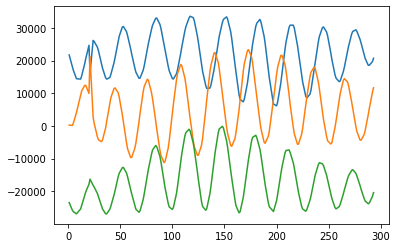

In [4]:
[pl.plot(dt[1:-1],m) for m in mags.T]

#### angles and gyros

set of five 2axis datas from gyro sensors on Lode modules (really? Lode has 3-axis gyro)

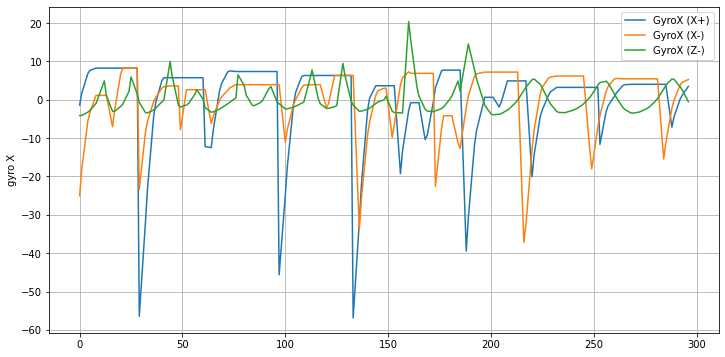

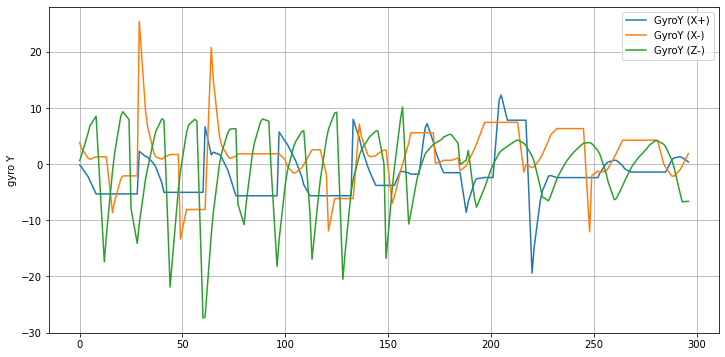

In [5]:
pl.figure(figsize=(12,6))
[pl.plot(dt,mok[c],label=c[2:-8]) for c in mok.columns[-10::4]]#[-9::2]
pl.ylabel("gyro X")
pl.legend()
pl.grid()
pl.figure(figsize=(12,6))
pl.ylabel("gyro Y")
[pl.plot(dt,mok[c],label=c[2:-8]) for c in mok.columns[-9::4]]
pl.legend()
pl.grid()

#### test of correlations via principal component analysis

In [6]:
gall=np.array([mok[c].to_numpy() for c in mok.columns[-10:]])
gall-=np.mean(gall,1)[:,np.newaxis]
gall/=np.std(gall,1)[:,np.newaxis]
gcov=gall@gall.T

In [7]:
eiv,evec=np.linalg.eig(gcov)

[[<matplotlib.lines.Line2D at 0x7faf8b3efcd0>],

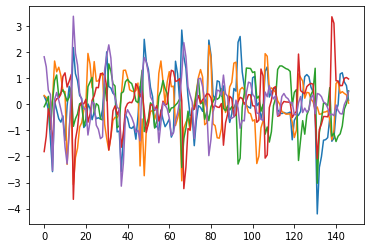

In [8]:
profiles=[v@gall for v in evec[:5]]
[pl.plot(p) for p in profiles]

In [9]:
np.array(np.where(evec>0.5)).T #most correlated pairs?

array([[0, 8],
       [1, 0],
       [2, 0],
       [2, 6],
       [3, 4],
       [4, 2],
       [5, 7],
       [7, 3],
       [8, 6],
       [9, 1]])

1.0000000000000002

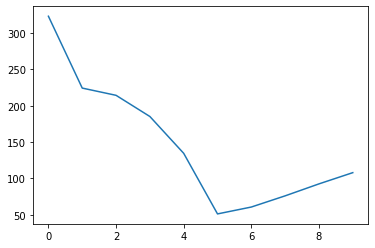

In [10]:
pl.plot(eiv)
(gall[2]**2).mean()

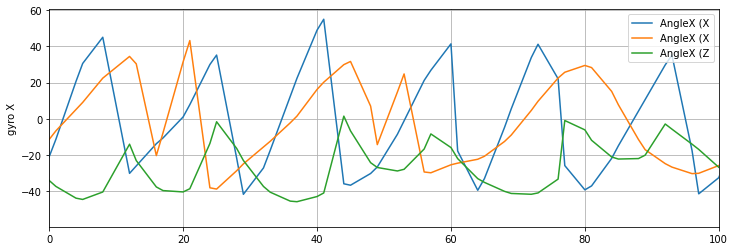

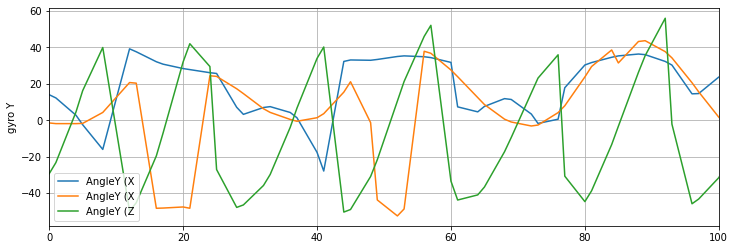

In [11]:
tmax=100
pl.figure(figsize=(12,4))
[pl.plot(dt,mok[c],label=c[2:-8]) for c in mok.columns[-10-10:-10:4]]#[-9::2]
pl.ylabel("gyro X")
pl.legend()
pl.xlim(0,tmax)
pl.grid()
pl.figure(figsize=(12,4))
pl.ylabel("gyro Y")
[pl.plot(dt,mok[c],label=c[2:-8]) for c in mok.columns[-9-10:-10:4]]
pl.legend()
pl.xlim(0,tmax)
pl.grid()

In [12]:
## no 
geero=[i for i,m in enumerate(mok.columns) if m.find('OBCgyro')>=0]
[mok[mok.columns[i+3]].std() for i in geero] #no data here
#pl.plot(dt,mok[mok.columns[geero[2]]]) 

[0.0, 0.0, 0.0]

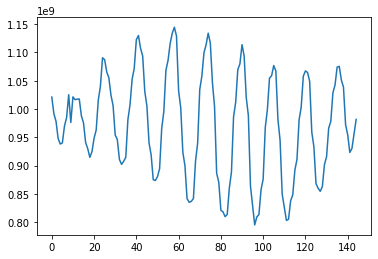

In [13]:
pl.plot((mags**2).sum(1))

Text(0.5, 1.0, 'Solar panel temps')

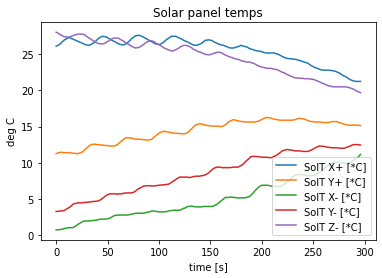

In [14]:
tpanel=np.array([mok[c].to_numpy() for c in [mok.columns[i] for i in range(21,26)]])
[pl.plot(dt,t) for t in tpanel]
pl.legend([mok.columns[i] for i in range(21,26)])
pl.ylabel("deg C")
pl.xlabel("time [s]")
pl.title("Solar panel temps")

Text(0.5, 1.0, 'SunSensor temps')

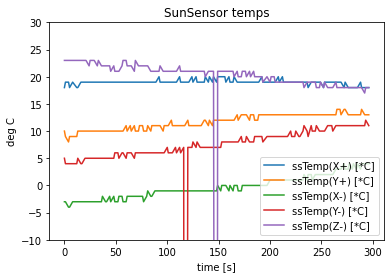

In [15]:
tpanel=np.array([mok[c].to_numpy() for c in [mok.columns[i] for i in range(27,32)]])
[pl.plot(dt,t) for t in tpanel]
pl.legend([mok.columns[i] for i in range(27,32)])
pl.ylim(-10,30)
pl.ylabel("deg C")
pl.xlabel("time [s]")
pl.title("SunSensor temps")

In [308]:
irpos=[i for i in range(len(mok.columns)) if mok.columns[i].find("IRR")>0]
rep=[]
qth = (48.7408,-21.2284,380)
from astropy import coordinates as coord
from astropy import units as u
import predict

tle= """GRBALPHA                
1 47959U 21022AD  22063.19213865  .00002067  00000+0  14319-3 0  9994
2 47959  97.5413 324.9761 0022167 141.3192  11.3230 15.06545409 50965"""
#tle= """GRBALPHA
#1 47959U 21022AD  22089.06574127  .00004075  00000-0  27671-3 0  9996
#2 47959  97.5376 350.3030 0022746  59.5456 300.8062 15.06733026 54867"""

pars=['longitude','latitude','altitude','epoch']
kosice=coord.EarthLocation.from_geodetic(qth[1],-qth[0],qth[2])#,unit=(u.degree, u.degree,u.meter))
kosrad=np.sqrt(sum(np.array(kosice.value.tolist())**2))*1e-3 #earth distance in km

d=mok['DK TimeStamp'][0]
x=datetime.strptime(d,"%d-%m-%Y %H:%M:%S")
y=predict.observe(tle, qth, at=x.timestamp())
print([y['longitude'],y['latitude'],y['altitude']])

tle= """GRBALPHA
1 47959U 21022AD  21261.56473559  .00000999  00000-0  72704-4 0  9998
2 47959  97.5478 161.8339 0022206 358.3728 121.5047 15.05855836 25884"""

tle= """GRBALPHA                
1 47959U 21022AD  21193.19189613  .00000206  00000-0  18448-4 0  9992
2 47959  97.5583  94.8656 0020163 224.9247 288.7034 15.05738947 15594"""

for d in mok['DK TimeStamp']:
    x=datetime.strptime(d,"%d-%m-%Y %H:%M:%S")
    y=predict.observe(tle, qth, at=x.timestamp())
    rep.append([y['longitude'],y['latitude'],y['altitude']])
print(rep[0])
rep=np.array(rep).T
if rep[0].max()-rep[0].min()>200:rep[0]=(rep[0]+180)%360-180
sat_coords=rep

[294.62560622779716, -62.09383739345331, 557.2180755783047]
[294.1800854774886, -62.709765303466, 559.4631124741627]


In [602]:
rep_recent=rep
mok['DK TimeStamp'][0]

'17-10-2021 04:20:03'

In [309]:
x=datetime.strptime(d,"%d-%m-%Y %H:%M:%S")
predict.observe(tle, qth, at=x.timestamp())

(array([294.18008548, -62.7097653 , 559.46311247]),
 array([264.11866088, -79.1763636 , 563.20497887]))

Text(0, 0.5, 'latitude')

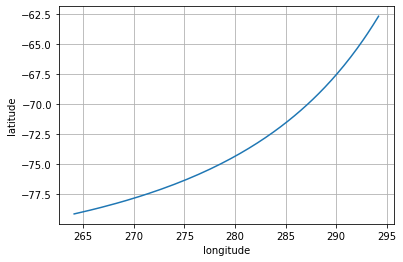

In [138]:
pl.plot(rep[0],rep[1])
pl.grid()
pl.xlabel("longitude")
pl.ylabel("latitude")

#### magnetic field

World Magnetic Model from http://geomag.bgs.ac.uk/data_service/models_compass/wmm_calc.html

In [18]:
from periodogram import get_mag_dir,sun_vec_CHall

pomag=[]
for i in [0,len(rep)-1]:
    day=mok['DK TimeStamp'][i].split(' ')[0]
    day='-'.join(day.split('-')[::-1])
    pomag.append(get_mag_dir(day,rep[1][i],rep[0][i],rep[2][i]))
    
pom1,pom2=pomag[0],pomag[-1]
vecs=[np.array([dic[t+'-intensity'] for t in ['east','north','vertical']]) for dic in pomag]#'declination'] 
norm=lambda v:np.sqrt(np.dot(v,v))
nvecs=[v/norm(v) for v in vecs]
nvecs

[array([ 0.24458514,  0.22145782, -0.94399923]),
 array([ 0.24654192,  0.21527611, -0.94491972])]

In [143]:
satcoor2=[coord.EarthLocation.from_geodetic(r[0],r[1],r[2]*1e3) for r in rep.T] 
sunvec_hall=np.array([sun_vec_CHall(t) for t in times])

In [20]:
# calculated magnetic vectors

all_rot=[]
from satutils import triad
dtot=dt[-1]
magdir=[coord.SkyCoord(pomag[i]['inclination'],pomag[i]['declination'],unit="deg",frame="altaz",location=satcoor2[i],obstime=times[i]) for i in [0,-1]]
magvec=[np.array([c.x.value,c.y.value,c.z.value]) for c in [m.fk5.cartesian for m in magdir]]
magvec=[m/norm(m) for m in magvec]
mag_inter = lambda t:(t/dtot*magvec[1]+(1-t/dtot)*magvec[0]) #linear interpolation of start/end



In [139]:
pomag_recent=pomag2

In [140]:
pomag2=[]
for i in range(0,len(times),10):
    day=mok['DK TimeStamp'][i].split(' ')[0]
    day='-'.join(day.split('-')[::-1])
    pomag2.append(get_mag_dir(day,rep[1][i],rep[0][i],rep[2][i]))


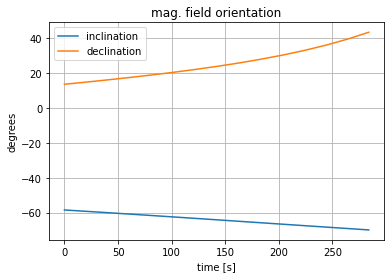

In [150]:
mag_altaz=np.array([[pomag2[i]['inclination'],pomag2[i]['declination']] for i in range(len(pomag2))]).T
pl.plot(dt[::10],mag_altaz[0],label="inclination")
pl.plot(dt[::10],mag_altaz[1],label="declination")
pl.legend()
pl.ylabel("degrees")
pl.xlabel("time [s]")
pl.title("mag. field orientation")
pl.grid()

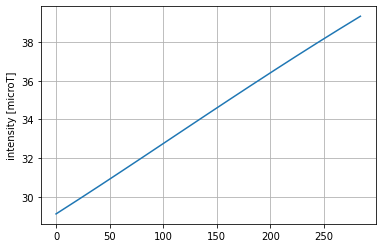

In [156]:
#pl.plot(dt[::10],mag_altaz[1],label="declination")#
i=2
pl.plot(dt[::10],[p['total-intensity']/1e3 for p in pomag2])
pl.ylabel("intensity [microT]")
pl.grid()

In [144]:
s=satcoor2[0]
rep[0][::10]-[s.lon.value for s in satcoor2[::10]]

array([360., 360., 360., 360., 360., 360., 360., 360., 360., 360., 360.,
       360., 360., 360., 360.])

In [161]:
magdir2=[coord.SkyCoord(pomag2[i]['inclination'],pomag2[i]['declination'],unit="deg",frame="altaz",location=satcoor2[10*i],obstime=times[10*i]) for i in range(len(pomag2))]
magvec=[np.array([c.x.value,c.y.value,c.z.value]) for c in [m.fk5.cartesian for m in magdir2]]
magvec=[m/norm(m) for m in magvec]
mag_inter1 = lambda t:(t/dtot*magvec[-1]+(1-t/dtot)*magvec[0]) #linear interpolation of start/end


In [166]:
dtex=list(dt[::10])+[dt[-1]*2-dt[-2]]
magvec=np.array(magvec+[2*magvec[-1]-magvec[-2]]) #small extrapolation
from scipy import interpolate as ip
intfun=[ip.interp1d(dtex,magvec[:,i]) for i in range(3)]
mag_inter2 = lambda t:np.array([pp(t) for pp in intfun])
mag_inter=mag_inter2

In [24]:
## prediction of Sun direction in body frame?
print("Hall sun vectors [times 1,10,147]")
print(np.array([sunvec_hall[i] for i in [1,10,-1]])) # in ECI
#from astropy.coordinates import get_body_barycentric, get_body, get_sun, EarthLocation
from astropy.time import Time
sunvec_apy=[]  #coord.get_sun(Time(t)) for j,t in enumerate(times)]
#for j,s in enumerate(sunvec_apy):
for j in range(len(times)):
    loc=coord.EarthLocation.from_geodetic(rep[0][j],rep[1][j],rep[2][j]*1e3)
    sunvec_apy.append(coord.get_sun(time=Time(times[j])))
    sunvec_apy[-1].location=loc
    #print(rep[0][j],rep[1][j])
import satutils as su
sunvec_loc=[su.fromangle(s.altaz.az.value,s.altaz.alt.value) for s in sunvec_apy] #local frame
sunvec_eci=[su.fromangle(s.ra.value,s.dec.value) for s in sunvec_apy] #equatorial
np.array([sunvec_eci[i] for i in [1,10,-1]])

Hall sun vectors [times 1,10,147]
[[-0.79041381 -0.56203706 -0.2436398 ]
 [-0.79041138 -0.56203993 -0.24364105]
 [-0.79037797 -0.56207949 -0.2436582 ]]


array([[-0.91553827, -0.36904756, -0.15997989],
       [-0.91553666, -0.36905093, -0.15998135],
       [-0.9155145 , -0.36909721, -0.16000141]])

In [22]:
j=0
coo=coord.AltAz(0*u.deg,-90*u.deg,obstime=times[j], location=satcoor2[j])
coo.obstime.location=coo.location
tm=coo.obstime.sidereal_time('mean')
sco=coord.SkyCoord(coo)#,frame='altaz')
nadir=sco
sco.icrs, rep[:,j],tm.deg,sco.separation(sunvec_apy[j]).deg

(<SkyCoord (ICRS): (ra, dec) in deg
     (173.13377064, 79.80301342)>,
 array([262.56078502, -79.68199158, 561.37571759]),
 353.4716814100295,
 90.24622821071249)

In [23]:
sco.separation(sunvec_apy[j]).deg

90.24622821071249

In [25]:
mbody=np.array([m/norm(m) for m in mags])

coo.obstime.location=coo.location
tm=coo.obstime.sidereal_time('mean')
tm.deg

353.4716814100295

#### correcting mag sensor normalization

assuming the total mag intensity should not vary (periodically) 

we try to minimize variability (std. deviation)

In [26]:
mcop=[0.99,1.02]
weis=lambda p:[p[0],p[1],3-p[1]-p[0]]
from scipy import optimize as op
goflat=op.fmin(lambda p:np.std(((mags*weis(p))**2).sum(1)),mcop)
goflat

Optimization terminated successfully.
         Current function value: 30122426.650988
         Iterations: 44
         Function evaluations: 86


array([0.89187898, 1.06213353])

Text(0, 0.5, 'total intensity [microT]')

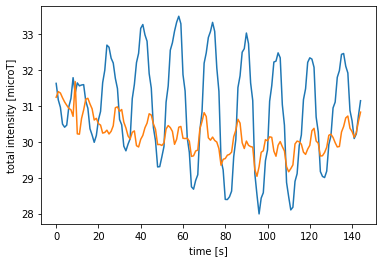

In [600]:
pl.plot(np.sqrt(((mags*weis(mcop))**2).sum(1))/1e3)

pl.plot(np.sqrt(((mags*weis(goflat))**2).sum(1))/1e3)
pl.xlabel('time [s]')
pl.ylabel("total intensity [microT]")

In [28]:
mbody=mags*weis(goflat)
mbody=np.array([m/norm(m) for m in mbody])
#mbody=mbody/norm(mbody)[:,np.newaxis]

### finding proper sun direction

- fix the magnetic field direction
- est. angle between sun and magnet
- vary "azimuth" of sun vector to fit best the observation

In [174]:
#angle2_recent=angle2.copy()

In [175]:
dt2=np.array(dt[1:-1])# skip first/last point

angle=[np.arccos(np.dot(mag_inter(dt[i]),sunvec_hall[i])) for i in range(1,len(dt)-1)]
#pl.plot(np.rad2deg(angle))
angle2=np.array([np.arccos(np.dot(mag_inter(dt[i]),sunvec_eci[i])) for i in range(1,len(dt)-1)])
#YES, we do use (correct?) mag field interpolation
#angle=np.mean(angle) #changes negligeable
print(np.rad2deg(np.max(angle2)-np.min(angle2)))
print(np.rad2deg((np.max(angle2)+np.min(angle2))/2))
#angle2=np.mean(angle2)
#np.rad2deg(angle),np.rad2deg(angle2)

40.28744287402853
106.32342103956621


Text(0, 0.5, 'angle Sun-North [deg]')

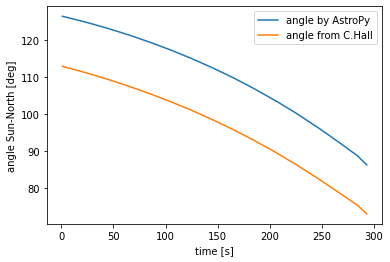

In [311]:
pl.plot(dt2,np.rad2deg(angle2),label="angle by AstroPy")
pl.plot(dt2,np.rad2deg(angle),label="angle from C.Hall")
pl.xlabel("time [s]")
#pl.plot(dt2,np.rad2deg(angle2_recent))
pl.legend()
pl.ylabel("angle Sun-North [deg]")

angle2 - between Sun and magnet. North  
wee - vector (set of..) with angle2 from `[1,0,0]` 

    rmatx@mbody -> [1,0,0]
    rmatx.T@[1,0,0] -> mbody
    
    rmatx.T@wee -> body frame

In [31]:
phi=np.r_[:2*np.pi:40j]
j,k=3,20
wee=np.array([np.cos(angle2[j]),np.sin(angle2[j])*np.cos(phi[k]),np.sin(angle2[j])*np.sin(phi[k])])

rmatx=triad(mbody[j],[0,0,1])
np.arccos((rmatx.T@wee).dot(mbody[j])),angle2[j]

(1.4418107759368408, 1.4418107759368408)

In [32]:
#[norm(a) for a in awee.T]
rmatx=triad(mbody[j],[0,0,1])
np.arccos((rmatx.T@wee).dot(mbody[j])),angle2[j]

(1.4418107759368408, 1.4418107759368408)

calculate Sun direction in body (satellite) coordinate frame (for all possible rotations perpendicular to magnetic field):

Text(0.5, 0, 'rotation (roll) angle')

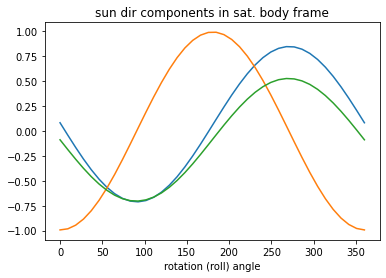

In [33]:
#np.allclose(rmatx.T@rmatx,np.eye(3)) # rmatx is orthonormal
j=0
rmatx=triad(mbody[j],[0,0,1])
#awee=np.array([np.cos(angle2[j])*np.ones_like(phi),np.sin(angle2[j])*np.cos(phi),np.sin(angle2[j])*np.sin(phi)])#
awee=np.array([np.cos(angle2[j])*np.ones_like(phi),np.sin(angle2[j])*np.cos(phi),np.sin(angle2[j])*np.sin(phi)])#
asun=rmatx.T@awee# in body frame
        #triad(mbody[j],[0,1,0]).T@awee[j] for  
[pl.plot(np.rad2deg(phi),s) for s in asun]
pl.title("sun dir components in sat. body frame")
pl.xlabel("rotation (roll) angle")

In [34]:
np.std([a.dot(mbody[j]) for a in asun.T])

4.2886630747702835e-17

#### similar for Earth (as light source) 

**not finished !!**

In [35]:
#[a for a in nadir.fk5.cartesian]
nadir_eci=su.eloc2cart(nadir.fk5.cartesian)
i=0
np.rad2deg(np.arccos(np.dot(mag_inter(dt[i]),nadir_eci))),np.rad2deg(np.arccos(np.dot(sunvec_eci[i],nadir_eci)))

(137.83193465747752, 90.24898556489393)

### try some model

we don't have much details about the sensor from [NEEDRONIX](https://sunsensor.eu/NXSS3v00.html)

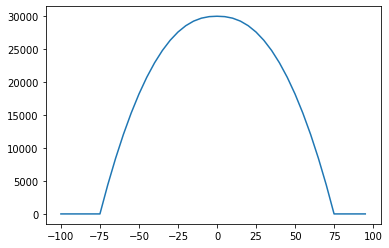

In [36]:
from scipy import stats as st
sens_amp=3e4
mang=75
zex=2.3
viewang=lambda ang:(abs(ang)<mang)*(1-(abs(ang)/mang)**zex)*sens_amp
angs=np.r_[-100:100:5]
pl.plot(angs,[viewang(a) for a in angs])

#### simulate SunSensor signal for different roll angle

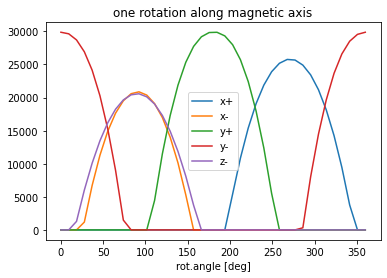

In [39]:
def predict_roll(asun):
    xp,xm=viewang(np.rad2deg(np.arccos(asun[0]))),viewang(180-np.rad2deg(np.arccos(asun[0])))
    yp,ym=viewang(np.rad2deg(np.arccos(asun[1]))),viewang(180-np.rad2deg(np.arccos(asun[1])))
    zm=viewang(180-np.rad2deg(np.arccos(asun[2])))
    return xp,yp,xm,ym,zm
xp,yp,xm,ym,zm=predict_roll(asun)
pl.plot(np.rad2deg(phi),xp,np.rad2deg(phi),xm)
pl.plot(np.rad2deg(phi),yp,np.rad2deg(phi),ym)
pl.plot(np.rad2deg(phi),zm)
pl.xlabel("rot.angle [deg]")
pl.title("one rotation along magnetic axis")
pl.legend("x+ x- y+ y- z-".split())

In [40]:
tle_all=open("/home/limu/Code/Notebook/Astro/alpha/ephem/tle_all.txt").readlines()
tle_arr=[tle_all[4*i+1].replace('-','.').replace('+','.').split()[3:]+tle_all[4*i+2].replace('-','.').split()[2:] for i in range(len(tle_all)//4)]

### statistics of other HK data

we correct amplitudes following "typical range" (saved in `coramp.pkz`) based on histograms

In [41]:
import pickle
irnorm=pickle.load(open("coramp.pkz","rb"))
irnorm

array([[13460.6, 23544.6],
       [10851.5, 23139.5],
       [16331.5, 29408.6],
       [11708. , 20586. ],
       [10867.8, 22073.8]])

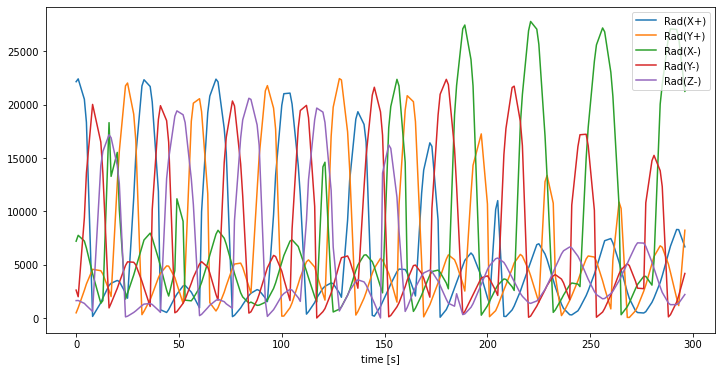

In [44]:
fig=pl.figure(figsize=(12,6))
irsens=np.array([mok[c].to_numpy() for c in [mok.columns[i] for i in irpos]])
pl.xlabel("time [s]")
[pl.plot(dt,s) for s in irsens]
pl.legend([mok.columns[i][4:] for i in irpos])
pl.savefig("/home/limu/Space/logs/alpha/sunsens_october.png")

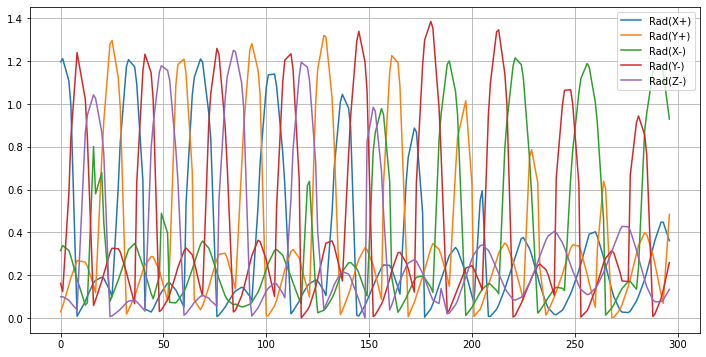

In [45]:
irsens2=irsens*2/(irnorm[:,0]+irnorm[:,1])[:,np.newaxis]
fig=pl.figure(figsize=(12,6))
[pl.plot(dt,s) for s in irsens2]
pl.legend([mok.columns[i][4:] for i in irpos])
pl.grid()

(64, 147)

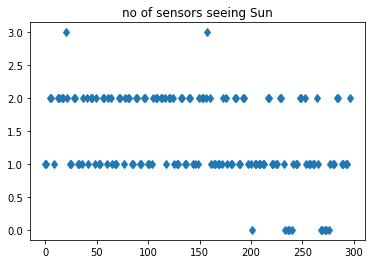

In [46]:
pl.plot(dt,(np.array(irsens2)>0.45).sum(0),'d')
pl.title("no of sensors seeing Sun")
sum((np.array(irsens2)>0.45).sum(0)>1),len(irsens[0])

[[<matplotlib.lines.Line2D at 0x7faf818c2050>],

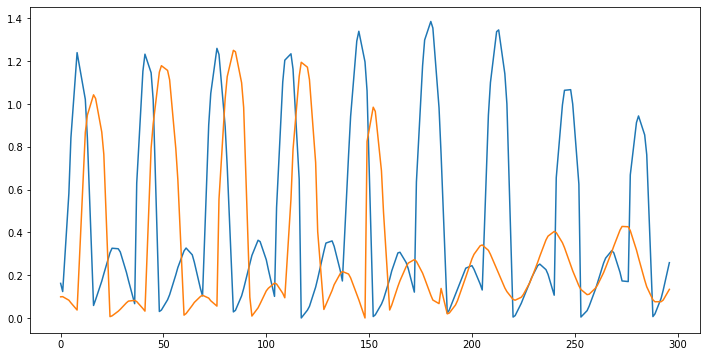

In [47]:
fig=pl.figure(figsize=(12,6))
[pl.plot(dt,s) for s in irsens2[-2:]]

(0.0, 120.0)

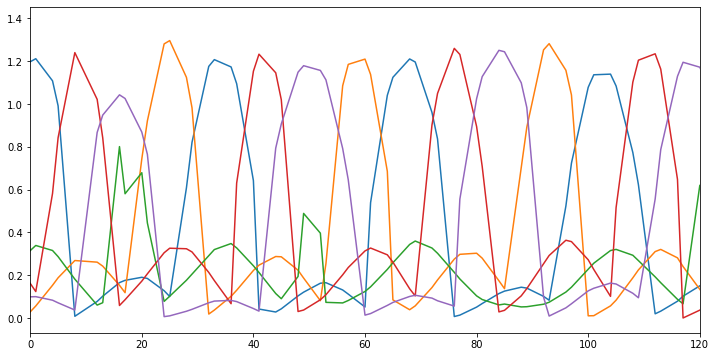

In [48]:
fig=pl.figure(figsize=(12,6))
[pl.plot(dt,s) for s in irsens2]
pl.xlim(0,120)

### rotating model vs. reality

Text(0, 0.5, 'simulated')

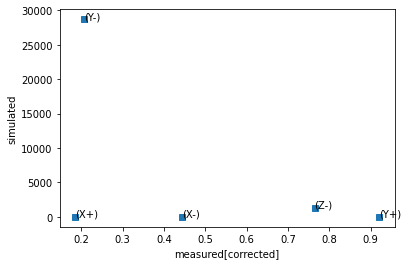

In [49]:
labels=[mok.columns[i][7:] for i in irpos]
simu=np.array([xp,yp,xm,ym,zm])
k=10
pl.plot(irsens2[:,k],simu[:,2],'s')
for i in range(5):
    pl.text(irsens2[i,k],simu[i,2],labels[i])
np.corrcoef(irsens2[:,k],simu[:,2])[0][1]
pl.xlabel("measured[corrected]")
pl.ylabel("simulated")
#pl.plot(phi,xp,phi,xm)
#pl.plot(phi,yp,phi,ym)
#pl.plot(phi,zm)

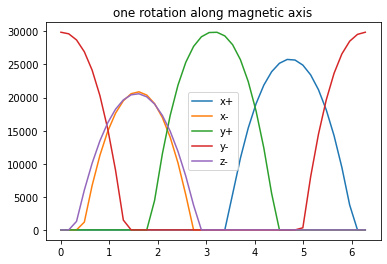

In [50]:
pl.plot(phi,xp,phi,xm)
pl.plot(phi,yp,phi,ym)
pl.plot(phi,zm)
pl.title("one rotation along magnetic axis")
pl.legend("x+ x- y+ y- z-".split())

#### matrix of rotation for every time

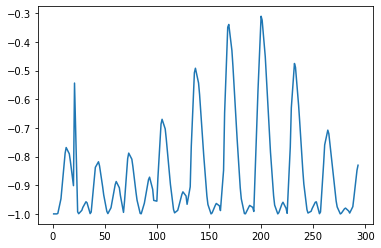

In [180]:
global aliad
aliad=[triad(m,[0,0,1]) for m in mbody]
pl.plot(dt2,[a[1][1] for a in aliad])

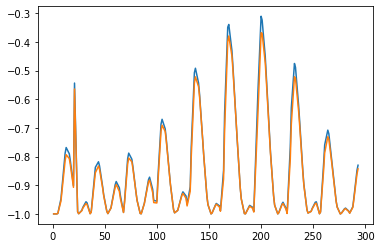

In [181]:
#should consider possible misalignment: small shift of mbody or "z axis" vector
dphi,dtheta=0.05,0.05
zaxis=[np.cos(dphi)*np.sin(dtheta),np.sin(dphi)*np.sin(dtheta),np.cos(dtheta)]
#zaxis
aliad2=[triad(m,zaxis) for m in mbody]
pl.plot(dt2,[a[1][1] for a in aliad])
pl.plot(dt2,[a[1][1] for a in aliad2])

Text(0, 0.5, 'roll angle[deg]')

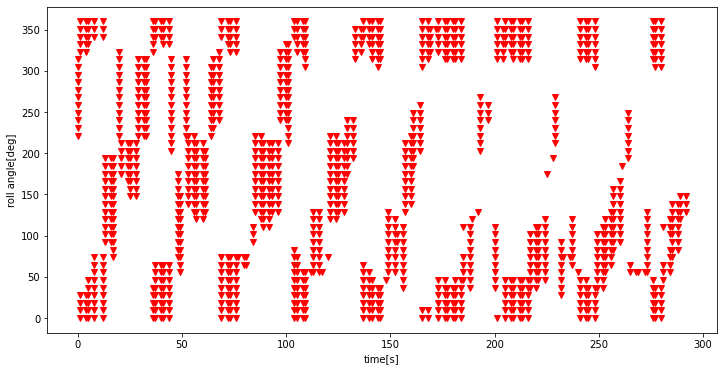

In [183]:
correl1=lambda real,simu:np.corrcoef(real,simu)[0][1] if simu.std()>10 else 0
correl2=lambda real,simu:st.spearmanr(real,simu).correlation #only rank(order) matters (Spearman)
correl=correl1

irsens22=irsens2[:,1:-1]

pl.figure(figsize=(12,6))
dphi=np.rad2deg(phi)
rmatx=triad(mbody[3],[0,0,1])
good_angs=[]
match_stats=[]
for i in range(len(dt2)):
    awee=np.array([np.cos(angle2[i])*np.ones_like(phi),np.sin(angle2[i])*np.cos(phi),np.sin(angle2[i])*np.sin(phi)])# sun dir in EQ frame
    #rmatx=triad(mbody[i],[0,0,1])
    try:
        asun=aliad[i].T@awee # in body frame
        simu=np.array(predict_roll(asun))
    except:
        print(f"failed {i}")
        good_angs.append([])
        continue
    prof1=[correl(irsens22[:,i],s) if s.std()>100 else 0 for s in simu.T]
    prof1=np.array(prof1)
    match_stats.append(np.percentile(prof1,[0,10,90,100]))
    pind=np.where(prof1>=0.97*prof1.max())[0]
    pl.plot(dt[i]*np.ones_like(pind),dphi[pind],'rv')
    good_angs.append(dphi[pind])
pl.xlabel("time[s]")
pl.ylabel("roll angle[deg]")

In [185]:
good_angs[0].mean(),phi0

(267.6923076923077, 267.0435877167787)

In [186]:
phi0=good_angs[0].mean()
timsel=np.array([dt[i] for i in range(len(good_angs)) if np.any((np.r_[good_angs[i]]>200)*(np.r_[good_angs[i]]<210))])
ind_pass=np.where(timsel[1:]-timsel[:-1]>20)[0]+1
tpass=timsel[ind_pass]
period=(tpass[1:]-tpass[:-1]).mean()
phi0,period

(267.6923076923077, 44.75)

In [188]:

imax=sum(dt2<180)
def phi_fun(period,phi0,samp,sphase=90,accel=0):
    '''predict phase with some sinusoidal modulation (samp, sphase) and period gradient (accel)
    '''
    phi_max=phi0+360*(dt2/period+dt2**2*accel)
    phi_max-=360*(phi_max/360).astype(int)
    return phi_max+samp*np.sin(np.deg2rad(phi_max-sphase))

correl=correl1
#correl=lambda real,simu:st.spearmanr(real,simu).correlation 
def model(period,phi0,samp,sphase,accel,predict=None):
    if predict==None: predict=predict_roll
    phi_pred=phi_fun(period,phi0,samp,sphase,accel)
    coefs=[]
    for i in range(imax):
        rphi=np.deg2rad(phi_pred[i])
        awee=np.array([np.cos(angle2[i])*np.ones_like(rphi),np.sin(angle2[i])*np.cos(rphi),np.sin(angle2[i])*np.sin(rphi)])# sun dir in EQ frame
        asun=aliad[i].T@awee # in body frame
        simu=np.array(predict_roll(asun))
        coefs.append(1-correl(irsens2[:,i],simu))

    return sum(coefs)
period=35 #by eye
pini=[period,phi0,3.5,160,0]
imax,model(*pini)

(88, 57.07193478896821)

In [189]:
from scipy.optimize import fmin
#before
#pfin=[ 3.34101036e+01,  2.67043588e+02,  3.55348684e+00,  1.59004931e+02,  -4.34752357e-06]
pfin1=fmin(lambda p:model(*p),pini)
#period,phi0,samp,sphase,accel=pfin
pfin1

array([3.46070521e+01, 2.72281566e+02, 3.65898255e+00, 1.52199999e+02,
       1.16192623e-06])

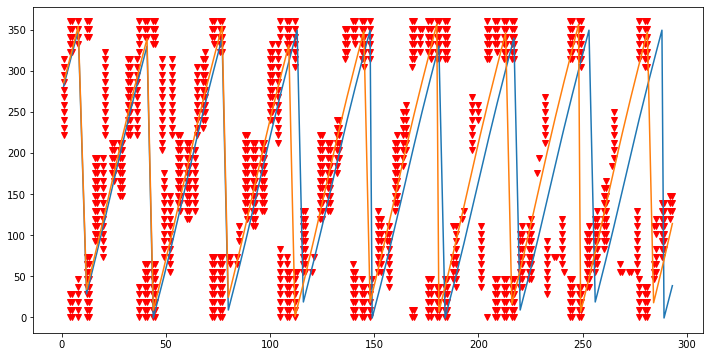

In [190]:
pl.figure(figsize=(12,6))
for i in range(len(dt2)):
    pgood=good_angs[i]
    pl.plot(dt2[i]*np.ones_like(pgood),pgood,'rv')
#pl.plot(dt,phi_max,':')
period,phi0,samp,sphase,accel=pini
phi_pred=phi_fun(period,phi0,samp,sphase,accel)
period,phi0,samp,sphase,accel=pfin1
pl.plot(dt2,phi_pred)
pl.plot(dt2,phi_fun(*pfin1))

In [206]:
#change of period over observ. time (acceleation/decceleration)
pfin1[-1]*dt2[-1]

0.00034044438595841597

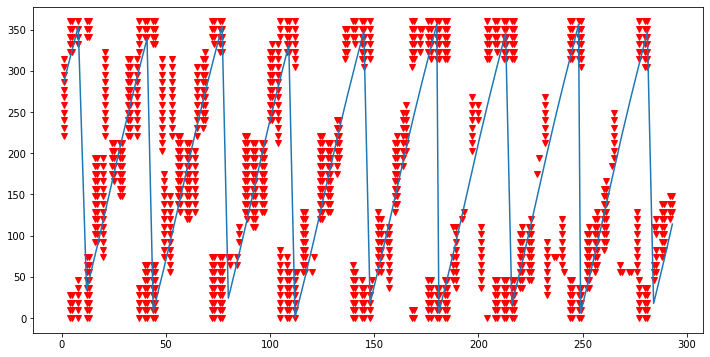

In [209]:
#pfin=[34.17824531, 287.31454935,  29.40824437,  91.28652249,0]
pl.figure(figsize=(12,6))
for i in range(len(dt2)):
    pgood=good_angs[i]
    pl.plot(dt2[i]*np.ones_like(pgood),pgood,'rv')
#pl.plot(dt,phi_max,':')
pl.plot(dt2,phi_fun(*pfin1))

In [210]:
def simu_sun(phi,rmatx):
    rphi=np.deg2rad(phi)
    awee=np.array([np.cos(angle2[i])*np.ones_like(rphi),np.sin(angle2[i])*np.cos(rphi),np.sin(angle2[i])*np.sin(rphi)])# sun dir in EQ frame
    return np.array(predict_roll(rmatx.T@awee))

### how good is overall correlation of model vs. measured sunsensors?

earth albedo contribution is not simulated, so values below 40% of max are neglected in first approx.

In [416]:
#wsel=slice(None,imax)
bangs=phi_fun(*pfinx[:5])[wsel]
simu_all=np.array([simu_sun(p,aliad[i]) for i,p in enumerate(bangs)]).T

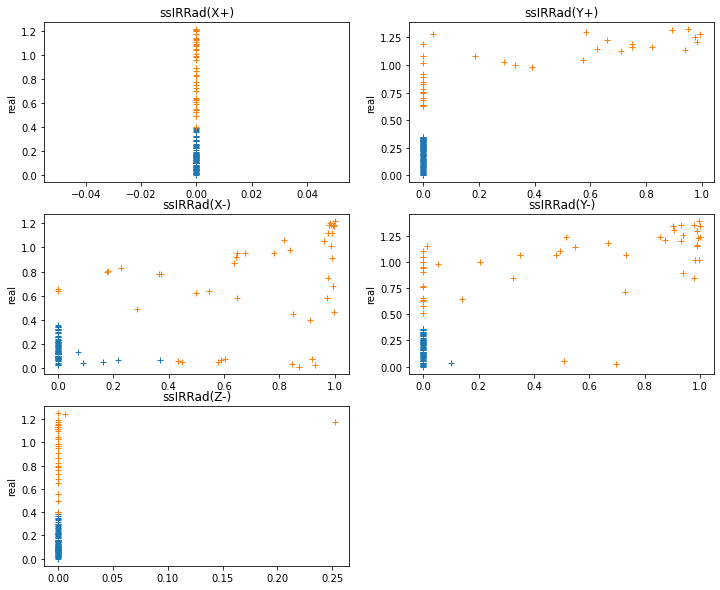

In [417]:
pl.figure(figsize=(12,10))
inlim=0.4
for i in range(5):
    pl.subplot(3,2,i+1)
    bad=((simu_all[i]/sens_amp)<inlim)*(irsens22[i,wsel]<inlim)
    nx=simu_all[i][bad]/sens_amp
    ny=irsens22[i,wsel][bad]
    pl.plot(nx,ny,'+')
    nx,ny=simu_all[i][bad==False]/sens_amp,irsens22[i,wsel][bad==False]
    pl.plot(nx,ny,'+')
    pl.title(mok.columns[irpos[i]])
    pl.ylabel('real')

In [414]:
i=2
#irsens22[i,wsel][bad]
bad=((simu_all[i]/sens_amp)<inlim)#*(irsens22[i,wsel]<inlim)

In [412]:
j=10
simu_sun(bangs[j],aliad[j])

array([   -0.        ,  1586.29703938, 17843.89290977,    -0.        ,
          -0.        ])

In [413]:
simu_all=np.array([simu_sun(p,aliad[i]) for i,p in enumerate(bangs)]).T
simu_all.shape

(5, 88)

In [391]:
pfin_start=pfin1.copy()

wsel=slice(None,130)
def minfun(pfin,inlim=0.2,axes=[],debug=0):
    merit=[]
    bangs=phi_fun(*pfin)[wsel]
    simu_all=np.array([simu_sun(p,aliad[i]) for i,p in enumerate(bangs)]).T
    cldness=[]
    if len(axes)==0:
        axes=range(len(pfin))
    for i in axes:
        bad=((simu_all[i]/sens_amp)<inlim)*(irsens2[i,wsel]<inlim)
        nx,ny=simu_all[i][bad==False]/sens_amp,irsens2[i,wsel][bad==False]
        if debug==1:
            print(sum(bad),len(nx),nx.std(),ny.std())
            continue
        if nx.std()<0.05:
            merit.append(ny.var()*len(nx)/2)
            if debug>0: print("skipping axis %i"%i)
            continue
        moo=np.polyfit(nx,ny,1)
        #print(len(nx),sum(bad),moo[0])
        ydist=abs(moo[0]*nx+moo[1]-ny)
        ylim=np.percentile(ydist,90)
        ysel=ydist<ylim
        nx,ny=nx[ysel],ny[ysel]
        goodsum=sum((moo[0]*nx+moo[1]-ny)**2*ny)
        badsum=0 #by default, points in bottom left quadrant have low contribution
        merit.append(goodsum+badsum)
        cldness.append(np.std(nx/ny))
    #print(cldness)
    if debug==2: return merit
    return sum(merit)
minfun(pfin_start,0.2)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [278]:
#minfun(pfine3[:5],0.2,debug=2)
#pfin_start=pfine3[:5]

/tmp/ipykernel_379945/4115056632.py:30: RuntimeWarning: divide by zero encountered in true_divide
  cldness.append(np.std(nx/ny))


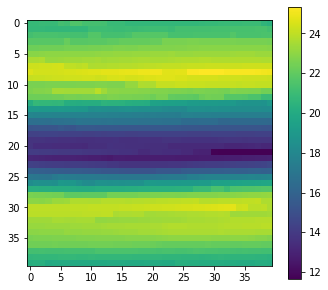

In [283]:
## calculating in a grid 40x40
pfin=pfin_start
bslice1=slice(.6,1.4,40j)
bslice2=slice(.6,1.4,40j)
bslice=bslice1
#pairs=(np.mgrid[bslice,bslice]*pfin[:2,np.newaxis,np.newaxis]).reshape(2,int(bslice.step.imag)**2).T
pairs=(np.mgrid[bslice,bslice2]).reshape(2,int(bslice.step.imag)**2).T
zall=[]
for p in pairs:
    zall.append(minfun([pfin[0],pfin[1]*p[0],pfin[2],pfin[3]*p[1],pfin[4]]))

blen=int(bslice.step.imag)
pl.figure(figsize=(5.5,5))
pl.imshow(np.array(zall).reshape(blen,blen))
pl.colorbar()

In [289]:
p=pairs[pmin]
pfina=[pfin[0],pfin[1]*p[0],pfin[2],pfin[3]*p[1],pfin[4]]
pfinb=pfin*([1,zmin[0],1,zmin[1],1])
minfun(pfina),minfun(pfinb)

(11.661327636844419, 11.661327636844419)

In [285]:
pmin=np.argmin(zall)
vmin=[bslice.start+(pmin//blen)/blen/5.,bslice2.start+(pmin%blen)/blen/5.]
print("minimum:",np.min(zall),pmin)
zmin=list(pairs[pmin])
pfinb=pfin*([1,zmin[0],1,zmin[1],1])#([1]+zmin[0]+[1]+zmin[1]+[1])
minfun(pfinb)


minimum: 11.661327636844419 872


22.861507747254272

In [290]:
def relgrad(qmin,dd=0.1,ilow=0,ihig=-1):
    #looking for gradient in all directions 
    rep=[]
    if ihig==-1: ihig=len(qmin)
    for qi in range(ilow,ihig):
        smin=lambda q:minfun(qmin*([1]*(qi)+[q]+[1]*(len(qmin)-qi-1)))
        rep.append([smin(1-dd),smin(1),smin(1+dd)])

    return rep
relgrad(pfinb,0.2)

/tmp/ipykernel_379945/4115056632.py:30: RuntimeWarning: divide by zero encountered in true_divide
  cldness.append(np.std(nx/ny))


[[22.325867930452816, 11.661327636844419, 22.414737829508844],
 [22.57077196967305, 11.661327636844419, 23.368426597281672],
 [11.793525726948209, 11.661327636844419, 11.631564663438017],
 [13.312234019884471, 11.661327636844419, 11.970115572588385],
 [12.033468906506016, 11.661327636844419, 11.63806060522882]]

In [291]:
qi=4
smin=lambda q:minfun(pfinb*([1]*(qi)+[q]+[1]*(4-qi)))
home=op.fmin(smin,[1.2])[0]
pfinc=pfinb*([1]*(qi)+[home]+[1]*(4-qi))

relgrad(pfinc,0.2)

/tmp/ipykernel_379945/849470327.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  smin=lambda q:minfun(pfinb*([1]*(qi)+[q]+[1]*(4-qi)))


Optimization terminated successfully.
         Current function value: 11.628367
         Iterations: 14
         Function evaluations: 29


/tmp/ipykernel_379945/4115056632.py:30: RuntimeWarning: divide by zero encountered in true_divide
  cldness.append(np.std(nx/ny))


[[22.094782993872023, 11.62836687233344, 22.42205851523711],
 [23.09644695873965, 11.62836687233344, 23.590637930076714],
 [11.690243279476707, 11.62836687233344, 11.599372172477121],
 [13.245218526253382, 11.62836687233344, 12.040703058374582],
 [11.668314212103477, 11.62836687233344, 11.796567147946199]]

In [292]:
#with longer timespan
qi=2
smin=lambda q:minfun(pfinc*([1]*(qi)+[q]+[1]*(4-qi)))
home=op.fmin(smin,[1.1])[0]
pfind=pfinc*([1]*(qi)+[home]+[1]*(4-qi))

relgrad(pfind)

/tmp/ipykernel_379945/1362483826.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  smin=lambda q:minfun(pfinc*([1]*(qi)+[q]+[1]*(4-qi)))


Optimization terminated successfully.
         Current function value: 11.557505
         Iterations: 19
         Function evaluations: 38


[[22.53960989877671, 11.557504907021364, 22.417714924596165],
 [16.23897274329668, 11.557504907021364, 20.499491231978148],
 [11.57269462411018, 11.557504907021364, 11.64572003001076],
 [13.138080274195074, 11.557504907021364, 11.659827845459727],
 [11.610678893310226, 11.557504907021364, 11.634523923467755]]

In [293]:
pfin_final=np.r_[ 3.35127428e+01,  2.48299696e+02,  3.47652399e+00,  2.06496957e+02,1.64583810e-06]
pfind-pfin_final

array([ 1.13081111e+00,  2.67792725e+01,  4.15524613e+00,  3.21713291e+01,
       -3.77703660e-07])

In [230]:
#with longer timespan
qi=2
#pfinc=pfin_final
smin=lambda q:minfun(pfinc*([1]*(qi)+[q]+[1]*(4-qi)))
home=op.fmin(smin,[1.0])[0]
pfind=pfinc*([1]*(qi)+[home]+[1]*(4-qi))

relgrad(pfind)

/tmp/ipykernel_379945/2747416918.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  smin=lambda q:minfun(pfinc*([1]*(qi)+[q]+[1]*(4-qi)))


Optimization terminated successfully.
         Current function value: 8.613195
         Iterations: 21
         Function evaluations: 42


/tmp/ipykernel_379945/1397505401.py:29: RuntimeWarning: divide by zero encountered in true_divide
  cldness.append(np.std(nx/ny))


[[21.98946172166596, 8.613195050041949, 22.251472458281867],
 [17.403013554098244, 8.613195050041949, 16.171137084736763],
 [8.646688152099335, 8.613195050041949, 8.802754188218284],
 [8.889293216138967, 8.613195050041949, 8.70302017739101],
 [8.978594139151493, 8.613195050041949, 8.486819411373933]]

In [231]:
minfun(pfind),pfind

(8.613195050041949,
 array([3.46070521e+01, 2.65299987e+02, 5.08567789e+00, 1.99156076e+02,
        1.16192623e-06]))

### modifying parameters of viewangle function

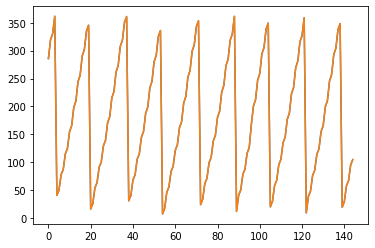

In [410]:
#imax=len(dt)
global gzex,gmang
gmang=75
gzex=2.3
gsens_amp=sens_amp


imax=88
#pfin2=fmin(lambda p:model(*p),pfin)

amp=3e5
def model2(period,phi0,samp,sphase,accel,mang=75,zex=2.3,rep=0):
    viewang=lambda ang:(abs(ang)<mang)*(1-(abs(ang)/mang)**zex)*sens_amp
    def predict_roll2(asun):
        adeg=np.rad2deg(np.arccos(asun))
        xp,xm=viewang(adeg[0]),viewang(180-adeg[0])
        yp,ym=viewang(adeg[1]),viewang(180-adeg[1])
        zm=viewang(180-adeg[2])
        return xp,yp,xm,ym,zm
    #return model(period,phi0,samp,sphase,accel,predict_roll2)
    phi_pred=phi_fun(period,phi0,samp,sphase,accel)
    if rep==1: return phi_pred
    coefs=[]
    for i in range(imax):
        rphi=np.deg2rad(phi_pred[i])
        awee=np.array([np.cos(angle2[i])*np.ones_like(rphi),np.sin(angle2[i])*np.cos(rphi),np.sin(angle2[i])*np.sin(rphi)])# sun dir in EQ frame
        asun=aliad[i].T@awee # in body frame
        simu=np.array(predict_roll2(asun))
        coefs.append(1-correl(irsens2[:,i],simu))

    return sum(coefs)

#pini2=list(pfin2)+[75,2.3]
#model2(*pini2)
#pfin3=fmin(lambda p:model2(*p),pini2)
gmang,gzex=mang,zex
pl.plot(model2(*pfinx[:5],75,2.3,rep=1))
gmang,gzex=[50.65334842,  4.1031158 ]
pl.plot(model2(*pfinx[:5],gmang,gzex,rep=1))

In [411]:
viewang=lambda ang:(abs(ang)<gmang)*(1-(abs(ang)/gmang)**gzex)*gsens_amp

#def predict_roll(asun):
#    xp,xm=viewang(np.rad2deg(np.arccos(asun[0]))),viewang(180-np.rad2deg(np.arccos(asun[0])))
#    yp,ym=viewang(np.rad2deg(np.arccos(asun[1]))),viewang(180-np.rad2deg(np.arccos(asun[1])))
#    zm=viewang(180-np.rad2deg(np.arccos(asun[2])))
#    return xp,yp,xm,ym,zm
def predict_roll(asun):
    adeg=np.rad2deg(np.arccos(asun))
    xp,xm=viewang(adeg[0]),viewang(180-adeg[0])
    yp,ym=viewang(adeg[1]),viewang(180-adeg[1])
    zm=viewang(180-adeg[2])
    return xp,yp,xm,ym,zm

def simu_sun(phi,rmatx):
    rphi=np.deg2rad(phi)
    awee=np.array([np.cos(angle2[i])*np.ones_like(rphi),np.sin(angle2[i])*np.cos(rphi),np.sin(angle2[i])*np.sin(rphi)])# sun dir in EQ frame
    return np.array(predict_roll(rmatx.T@awee))

/tmp/ipykernel_379945/4115056632.py:30: RuntimeWarning: divide by zero encountered in true_divide
  cldness.append(np.std(nx/ny))
/usr/local/lib64/python3.10/site-packages/numpy/core/_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


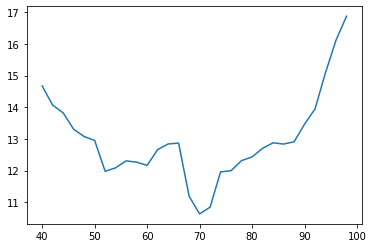

In [418]:
rep=[]
for g in range(40,100,2):
    gmang=g
    rep.append(minfun(pfinx[:5]))
pl.plot(range(40,100,2),rep)

In [234]:
pfinx=pfind
def exfun(wpars): #only updating sunsensor profile
    global gmang,gzex
    gmang,gzex=wpars[:2]
    return minfun(pfinx)
def exfun2(wpars):  #fitting all parameters
    global gmang,gzex
    gmang,gzex=wpars[-2:]
    return minfun(wpars[:5])
op.fmin(exfun,[52,2.3])

Optimization terminated successfully.
         Current function value: 8.396363
         Iterations: 108
         Function evaluations: 215


array([52.01075277,  2.85476803])

In [294]:
#now working with 7 parameters
pini3=np.array(list(pfind)+[gmang,gzex])

In [295]:
pini3=np.array(list(pfind)+[gmang,gzex])
#op.fmin(exfun,[52,2.3])
#op.fmin(exfun2,pini3)
def relgrad2(qmin,dd=0.1,ilow=0,ihig=-1,nefun=None): #gradient of some arbitrary function (nefun)
    if exfun==None: nefun=minfun
    rep=[]
    if ihig==-1: ihig=len(qmin)
    for qi in range(ilow,ihig):
        smin=lambda q:nefun(qmin*([1]*(qi)+[q]+[1]*(len(qmin)-qi-1)))
        rep.append([smin(1-dd),smin(1),smin(1+dd)])

    return rep
relgrad2(pini3,dd=0.2,nefun=exfun2)

/tmp/ipykernel_379945/4115056632.py:30: RuntimeWarning: divide by zero encountered in true_divide
  cldness.append(np.std(nx/ny))


[[22.04779514506427, 11.557504907021364, 22.43450233258655],
 [22.65848694398117, 11.557504907021364, 23.60669291616528],
 [11.599743242071504, 11.557504907021364, 11.919032763347964],
 [13.184467185908444, 11.557504907021364, 11.843419803913424],
 [11.750027706845438, 11.557504907021364, 11.725521051532148],
 [14.425023083911872, 11.557504907021364, 12.850293328107554],
 [13.043765609940651, 11.557504907021364, 11.82367481525451]]

In [331]:
grscale=0.2
grad_p1=np.array(relgrad2(pfine3,dd=0.1*grscale,nefun=exfun2))
grad_p2=np.array(relgrad2(pfine3,dd=0.2*grscale,nefun=exfun2))
grad_f=np.concatenate([grad_p1.T,grad_p2.T[[0,2]]]).T

/tmp/ipykernel_379945/4115056632.py:30: RuntimeWarning: divide by zero encountered in true_divide
  cldness.append(np.std(nx/ny))
/usr/local/lib64/python3.10/site-packages/numpy/core/_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


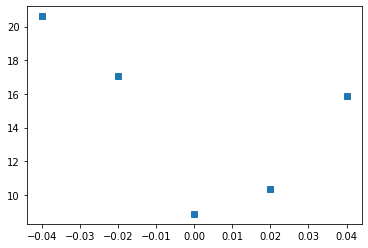

In [333]:
sigs=np.r_[-0.1,0,0.1,-0.2,0.2]*grscale
pl.plot(sigs,grad_f[0],'s')

In [336]:
zmin=np.argmin(grad_f,1)
sigs[zmin]

array([ 0.  , -0.02,  0.04, -0.04, -0.02,  0.04, -0.02])

In [474]:
#wsel=slice(None,110)
np.array(relgrad2(pfinex2,dd=0.1*grscale,nefun=exfun2))

/tmp/ipykernel_379945/4115056632.py:30: RuntimeWarning: divide by zero encountered in true_divide
  cldness.append(np.std(nx/ny))
/usr/local/lib64/python3.10/site-packages/numpy/core/_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


array([[12.19570437,  7.22402771, 10.74053867],
       [ 7.59200106,  7.22402771,  7.43151345],
       [ 7.07928789,  7.22402771,  7.22452428],
       [ 7.45411715,  7.22402771,  7.07678675],
       [ 7.19265309,  7.22402771,  7.08273688],
       [ 7.48440888,  7.22402771,  7.40748251],
       [ 7.22740273,  7.22402771,  7.07674695]])

0.9400000000000002

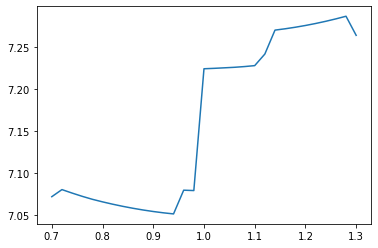

In [473]:
qmin=pfinex2
qi=2
smin=lambda q:exfun2(qmin*([1]*(qi)+[q]+[1]*(7-qi-1)))
zx=np.r_[0.7:1.3:0.02]
vals=np.array([smin(x) for x in zx])
pl.plot(zx,vals)
#home=op.fmin(smin,[1.2])[0]
#home
zx[np.argmin(vals)]

In [476]:
pfinx=pfinex2*([1]*qi+[0.94]+[1]*(6-qi))
exfun2(pfinx)
np.array(relgrad2(pfinx,dd=0.2*grscale,nefun=exfun2))

/tmp/ipykernel_379945/4115056632.py:30: RuntimeWarning: divide by zero encountered in true_divide
  cldness.append(np.std(nx/ny))


array([[20.23812257,  7.05153733, 16.94838917],
       [ 9.129792  ,  7.05153733,  8.49115892],
       [ 7.05419937,  7.05153733,  7.07932839],
       [ 7.60334938,  7.05153733,  7.1080541 ],
       [ 7.19285176,  7.05153733,  7.0879392 ],
       [ 7.7954952 ,  7.05153733,  7.15842476],
       [ 7.20388714,  7.05153733,  7.07653638]])

In [478]:
#[grad_f[i][zmin[i]] for i in range(len(zmin))]
grarr=Out[476].T
curv=(grarr[2]+grarr[2]-2*grarr[1])/0.2/grscale
1/curv

array([0.00202084, 0.01389254, 0.7196559 , 0.35387725, 0.54942235,
       0.18711274, 0.80003032])

In [483]:
multiscale=np.r_[0.002,0.014,0.7,0.35,0.5,0.2,0.8]
grid=np.mgrid[-2:3,-2:3,-2:3,-2:3,-2:3,-2:3,-2:3]
grid.shape

(7, 5, 5, 5, 5, 5, 5, 5)

In [494]:
coor=grid.reshape(7,5**7)*multiscale[:,np.newaxis]*0.2*grscale+1

In [499]:
map1=[exfun2(coor[:,i]*pfinex2) for i in range(len(coor[0]))]

In [492]:
exfun2((0.2*grscale/curv+1)*pfinex2)

7.110143531361466

In [500]:
zmin=np.argmin(map1)
map1[zmin],exfun2(pfinex2)

(7.028392131455321, 7.224027706958893)

In [502]:
pfinex3=pfinex2*coor[:,zmin]
exfun2(pfinex3)

7.028392131455321

In [440]:
def min_one_axis(qmin,qi=4,qstart=0.8,showgrad=True):
    smin=lambda q:exfun2(qmin*([1]*(qi)+[q]+[1]*(len(qmin)-qi-1)))
    home=op.fmin(smin,[qstart])[0]
    home
    qout=qmin*([1]*(qi)+[home]+[1]*(len(qmin)-1-qi))
    if showgrad:
        grout=relgrad2(qout,dd=0.2,nefun=exfun2)
        print([[g[0]-g[1],g[2]-g[1]] for g in grout])
    return qout
pfine4=min_one_axis(pfine3,4)

/tmp/ipykernel_379945/2731655189.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  smin=lambda q:exfun2(qmin*([1]*(qi)+[q]+[1]*(len(qmin)-qi-1)))
/tmp/ipykernel_379945/4115056632.py:30: RuntimeWarning: divide by zero encountered in true_divide
  cldness.append(np.std(nx/ny))


Optimization terminated successfully.
         Current function value: 10.249723
         Iterations: 12
         Function evaluations: 24
[[10.395246742531064, 9.808581619279082], [9.999670203629105, 10.35709587707808], [0.06731810029691765, -0.20578752950094525], [1.166151403144024, -0.13030315823131922], [0.27784564475141416, -0.17207507645746567], [1.4280462060896433, -0.7015047435765958], [-0.1445909869461488, 0.03310902423162965]]


In [378]:
inlim=0.3
i=2
bad=((simu_all[i]/sens_amp)<inlim)*(irsens2[i,wsel]<inlim)
irsens2[i,wsel][bad]

array([0.28666312, 0.18146003, 0.06016602, 0.07140343, 0.07748125,
       0.10161762, 0.17630045, 0.2048968 , 0.29099193, 0.2439435 ,
       0.21263618, 0.11425423, 0.08994296, 0.19396547, 0.0703103 ,
       0.0817226 , 0.12383007, 0.14551783, 0.22689063, 0.25797932,
       0.21324833, 0.18224709, 0.1033229 , 0.05168332, 0.05264527,
       0.0642762 , 0.07358969, 0.12103165, 0.14385627, 0.22837729,
       0.25592423, 0.29309075, 0.26812359, 0.19217273, 0.16480069,
       0.08723199, 0.13397435, 0.02461735, 0.03624828, 0.04569295,
       0.09344099, 0.11425423, 0.19462135, 0.21705243, 0.25762952,
       0.25907246, 0.23082591, 0.20935678, 0.12829006, 0.10306055,
       0.1910796 , 0.02689106, 0.04018356, 0.09365961, 0.11560972,
       0.17586319, 0.19029254, 0.19628291, 0.18718805, 0.14320039,
       0.11958872, 0.04997803, 0.06803658, 0.11875794, 0.13428042,
       0.16003463, 0.15811072, 0.12798398, 0.1128113 ])

In [463]:
pfinex2=op.fmin(exfun2,pfinx)
pfinex2

/tmp/ipykernel_379945/4115056632.py:30: RuntimeWarning: divide by zero encountered in true_divide
  cldness.append(np.std(nx/ny))
/usr/local/lib64/python3.10/site-packages/numpy/core/_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


array([3.46289732e+01, 2.60163255e+02, 8.97738714e+00, 2.31550963e+02,
       1.00265291e-06, 7.49481463e+01, 2.30188919e+00])

In [445]:
#exfun2(pfinex2)
pfinex2/pfinx

array([1.00210344, 1.01353309, 1.02333141, 0.93423571, 1.08705838,
       0.99629648, 0.98683383])

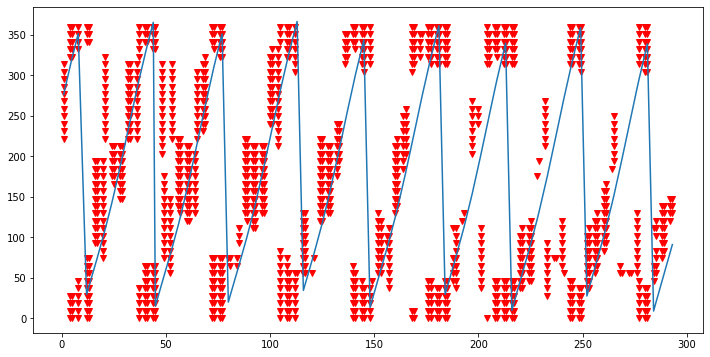

In [565]:
def plot_match(profs,sel=[]):
    pl.figure(figsize=(12,6))
    for i in range(len(dt2)):
        pgood=good_angs[i]
        if len(pgood)>0:
            if i in sel:
                pl.plot(dt2[i]*np.ones_like(pgood),pgood,'bv')
            else:
                pl.plot(dt2[i]*np.ones_like(pgood),pgood,'rv')
        #pl.axvline(dt[i],0,0.5)
    #pl.plot(dt,phi_max,':')
    for p in profs:
        pl.plot(dt2,p)#phi_fun(*p))
plot_match([model2(*pfinex2,rep=1)])

In [326]:
phi_mod=model2(*pfin3,rep=1)
zerids=np.where(phi_mod[1:]<phi_mod[:-1])[0]
i0,i1=zerids[:2]+1
rphi=np.deg2rad(phi_mod[i0:i1])
awee=np.array([np.cos(angle2[i0:i1])*np.ones_like(rphi),np.sin(angle2[i])*np.cos(rphi),np.sin(angle2[i])*np.sin(rphi)])
asun=rmatx.T@awee

In [504]:
pfinx=pfinex3

In [505]:
period,phi0,samp,sphase,accel=pfinx[:5]
text=f'''current best fit:
(19/05/22)

- period {period:.2f} s
- phase {phi0:.2f} deg
- sampl {samp:.2f} deg
- phase2 {sphase:.2f} deg
- period drift/accel {accel:.3g} /s*2
       


- limit angle {gmang:.2f} deg, 
- power {gzex:.2f}
'''
text+=r'$$ampl \left(1-\left(\frac{|ang|}{ang_{lim}}\right)^{zex}\right)$$'

from IPython.display import display, Markdown
display(Markdown(text))

current best fit:
(19/05/22)

- period 34.63 s
- phase 259.87 deg
- sampl 8.47 deg
- phase2 231.55 deg
- period drift/accel 1.02e-06 /s*2
       


- limit angle 75.55 deg, 
- power 2.15
$$ampl \left(1-\left(\frac{|ang|}{ang_{lim}}\right)^{zex}\right)$$

In [465]:
pfinex2

array([3.46289732e+01, 2.60163255e+02, 8.97738714e+00, 2.31550963e+02,
       1.00265291e-06, 7.49481463e+01, 2.30188919e+00])

In [591]:
i=10
vsel=phi_fun(*pfind)[i]
#sun1=simu_sun(vsel,aliad[i])  
#sun1
wsel=slice(None,150)
bangs=phi_fun(*pfinex2[:5])[wsel]
bangs=phi_fun(*pout5[:5])[wsel]

dphi,dtheta=pout5[-2:]
zaxis=[np.cos(dphi)*np.sin(dtheta),np.sin(dphi)*np.sin(dtheta),np.cos(dtheta)]
aliad=[triad(m,zaxis) for m in mbody]

simu_all=np.array([simu_sun(p,aliad[i]) for i,p in enumerate(bangs)]).T

sel_real=((np.array(irsens22)>0.45).sum(0)>1)[wsel]
sel_simu=(simu_all>0.45).sum(0)>1
sum(sel_real),sum(sel_simu),sum(sel_real*sel_simu)

(63, 83, 35)

In [590]:
#gmang,gzex,pfinex4[5:7]

(75.64267854288816, 2.177868980662792, [75.6426794, 2.1778689])

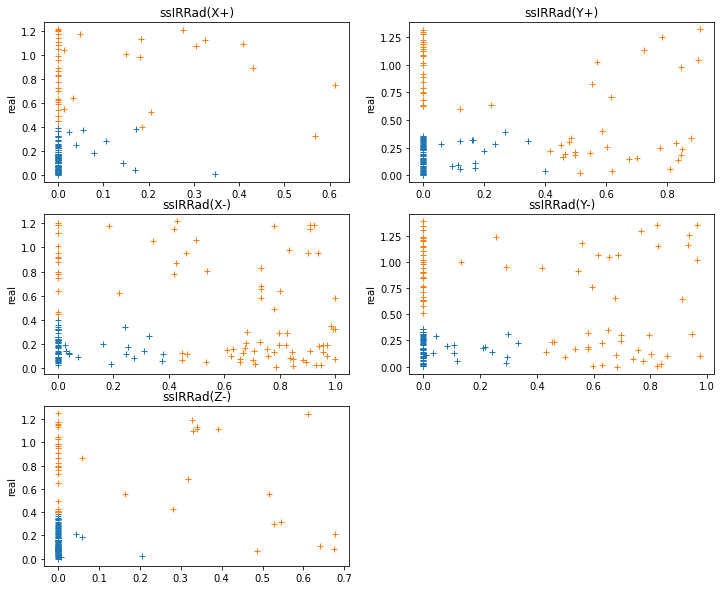

In [592]:

pl.figure(figsize=(12,10))
inlim=0.4
for i in range(5):
    pl.subplot(3,2,i+1)
    bad=((simu_all[i]/sens_amp)<inlim)*(irsens22[i,wsel]<inlim)
    nx,ny=simu_all[i][bad]/sens_amp,irsens22[i,wsel][bad]
    pl.plot(nx,ny,'+')
    nx,ny=simu_all[i][bad==False]/sens_amp,irsens22[i,wsel][bad==False]
    pl.plot(nx,ny,'+')
    pl.title(mok.columns[irpos[i]])
    pl.ylabel('real')

### test a misalignment

In [533]:
#exfun2(pfinex3)
def misfun(pars):
    global aliad
    dphi,dtheta=pars[-2:]
    zaxis=[np.cos(dphi)*np.sin(dtheta),np.sin(dphi)*np.sin(dtheta),np.cos(dtheta)]
    aliad=[triad(m,zaxis) for m in mbody]
    #return exfun2(np.r_[pfinex3[:-2],pars[:2]])
    return exfun2(pars[:-2])

In [526]:
def minfun(pfin,inlim=0.2,axes=[],debug=0):
    global aliad
    merit=[]
    bangs=phi_fun(*pfin)[wsel]
    simu_all=np.array([simu_sun(p,aliad[i]) for i,p in enumerate(bangs)]).T
    cldness=[]
    if len(axes)==0:
        axes=range(len(pfin))
    for i in axes:
        bad=((simu_all[i]/sens_amp)<inlim)*(irsens2[i,wsel]<inlim)
        nx,ny=simu_all[i][bad==False]/sens_amp,irsens2[i,wsel][bad==False]
        if debug==1:
            print(sum(bad),len(nx),nx.std(),ny.std())
            continue
        if nx.std()<0.05:
            merit.append(ny.var()*len(nx)/2)
            if debug>0: print("skipping axis %i"%i)
            continue
        moo=np.polyfit(nx,ny,1)
        #print(len(nx),sum(bad),moo[0])
        ydist=abs(moo[0]*nx+moo[1]-ny)
        ylim=np.percentile(ydist,90)
        ysel=ydist<ylim
        nx,ny=nx[ysel],ny[ysel]
        goodsum=sum((moo[0]*nx+moo[1]-ny)**2*ny)
        badsum=0 #by default, points in bottom left quadrant have low contribution
        merit.append(goodsum+badsum)
        cldness.append(np.std(nx/ny))
    #print(cldness)
    if debug==2: return merit
    return sum(merit)


In [529]:
misfun([0.01,0.05]),misfun([0.01,-0.05]),misfun([0,0])

(7.5149578636175365, 7.2702025384555835, 7.028392131455321)

In [540]:
#cini=[-0.00074139,  0.00363501]
op.fmin(misfun,pini_last)#list(pfinex3)+cini)

/tmp/ipykernel_379945/3071901072.py:28: RuntimeWarning: divide by zero encountered in true_divide
  cldness.append(np.std(nx/ny))


Optimization terminated successfully.
         Current function value: 7.003689
         Iterations: 54
         Function evaluations: 263


array([3.46508217e+01, 2.61204706e+02, 8.52427661e+00, 2.31146590e+02,
       9.85928507e-07, 7.56426794e+01, 2.17786890e+00, 5.52031335e-03,
       5.27567832e-03])

In [532]:
pfinex3[-2:]=[7.55242233e+01, 2.17220968e+00]
cini=[4.69579861e-03, 4.90580931e-03]
misfun(list(pfinex3[-2:])+cini)

7.009077419942341

In [538]:
Out[534][1]-np.array(list(pfinex3)+cini)

array([ 1.63078451e-02,  1.33283425e+00,  4.96231484e-02, -4.04373212e-01,
       -3.67774623e-08,  1.18456134e-01,  5.65921671e-03,  8.24514738e-04,
        3.69869005e-04])

In [539]:
pini_last=Out[534][1]

### almost there

try last fit on different merit function - calculate model match considering only cases with 2 sunsensors illuminated

In [543]:
pfinex4=[3.46508217e+01, 2.61204706e+02, 8.52427661e+00, 2.31146590e+02, 9.85928507e-07, 7.56426794e+01, 2.17786890e+00, 5.52031335e-03,       5.27567832e-03]
len(pfinex4)

9

In [571]:
wsel=slice(None,145,None)
bangs=phi_fun(*pfinex2[:5])[wsel]
simu_all=np.array([simu_sun(p,aliad[i]) for i,p in enumerate(bangs)]).T
sel_real=((np.array(irsens22)>0.40).sum(0)>1)[wsel]
sel_simu=(simu_all>0.1).sum(0)>1
delta_sel=(sel_real*sel_simu)
sum(delta_sel),sum(sel_real)

(43, 68)

In [555]:
#delta_sel=
def model3(period,phi0,samp,sphase,accel,mang=75,zex=2.3,dtheta=0,dphi=0,rep=0):
    global aliad
    viewang=lambda ang:(abs(ang)<mang)*(1-(abs(ang)/mang)**zex)*sens_amp
    def predict_roll2(asun):
        adeg=np.rad2deg(np.arccos(asun))
        xp,xm=viewang(adeg[0]),viewang(180-adeg[0])
        yp,ym=viewang(adeg[1]),viewang(180-adeg[1])
        zm=viewang(180-adeg[2])
        return xp,yp,xm,ym,zm
    #return model(period,phi0,samp,sphase,accel,predict_roll2)
    phi_pred=phi_fun(period,phi0,samp,sphase,accel)
    if rep==1: return phi_pred
    coefs=[]
    zaxis=[np.cos(dphi)*np.sin(dtheta),np.sin(dphi)*np.sin(dtheta),np.cos(dtheta)]
    aliad=[triad(m,zaxis) for m in mbody]
    for i in np.r_[:len(delta_sel)][delta_sel]:
        rphi=np.deg2rad(phi_pred[i])
        awee=np.array([np.cos(angle2[i])*np.ones_like(rphi),np.sin(angle2[i])*np.cos(rphi),np.sin(angle2[i])*np.sin(rphi)])# sun dir in EQ frame
        asun=aliad[i].T@awee # in body frame
        simu=np.array(predict_roll2(asun))
        coefs.append(1-correl(irsens22[:,i],simu))

    return sum(coefs)


In [559]:
nemod=lambda p:model3(*(np.r_[p,pfinex4[-5:]]))
pini4=pfinex4[:-5]
op.fmin(nemod,pini4)

Optimization terminated successfully.
         Current function value: 10.795913
         Iterations: 252
         Function evaluations: 421


array([ 35.3489974 , 326.98511781,  24.04161396, 216.7684205 ])

In [563]:
ppart1=np.r_[ 35.3489974 , 326.98511781,  24.04161396, 216.7684205 ]
model3(*np.r_[ppart1,pfinex4[-5:]])

10.795912790956327

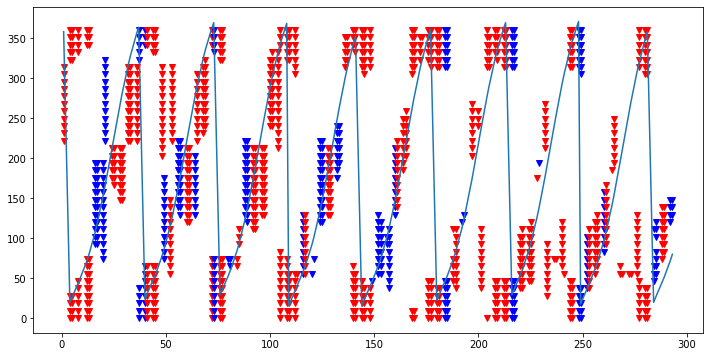

In [572]:
pout4=np.r_[ppart1,pfinex4[-5:]]
plot_match([model3(*pout4,rep=1)],np.where(delta_sel)[0])

In [574]:
nemod2=lambda p:model3(*(np.r_[pout4[:-5],p]))
pini5=pout4[-5:]
pout5=op.fmin(nemod2,pini5)
nemod2(pout5)

Optimization terminated successfully.
         Current function value: 12.230280
         Iterations: 545
         Function evaluations: 897


12.230279945116303

In [578]:
pini6=np.r_[pout4[:-5],pout5]
model3(*pini6)

12.230279945116303

In [579]:
op.fmin(lambda p:model3(*p),pini6)

Optimization terminated successfully.
         Current function value: 10.756876
         Iterations: 1133
         Function evaluations: 1690


array([ 3.57400370e+01,  3.16197674e+02,  1.34153258e+01,  1.96095856e+02,
        3.14704832e-06,  6.74658334e+01,  3.33723919e+01,  2.78625855e-01,
       -2.10996165e-01])

In [580]:
pout5

array([ 1.34161492e-06,  6.98317528e+01,  8.71408217e+00,  9.80480926e-02,
       -6.55505827e-02])

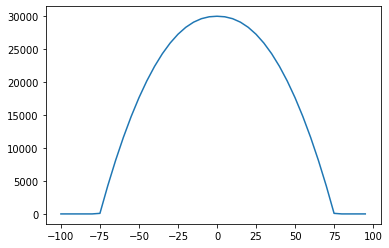

In [455]:
angs=np.r_[-100:100:5]
pl.plot(angs,[viewang(a) for a in angs])

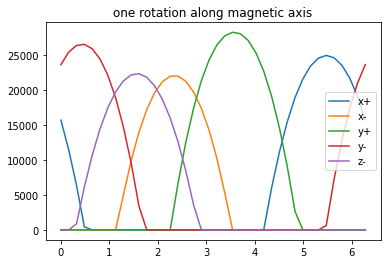

In [456]:
xp,yp,xm,ym,zm=predict_roll(asun)
pl.plot(phi,xp,phi,xm)
pl.plot(phi,yp,phi,ym)
pl.plot(phi,zm)
pl.title("one rotation along magnetic axis")
pl.legend("x+ x- y+ y- z-".split())

#### calculating correct orientation for one time 
(when two detectors seen Sun)

Text(0, 0.5, 'real')

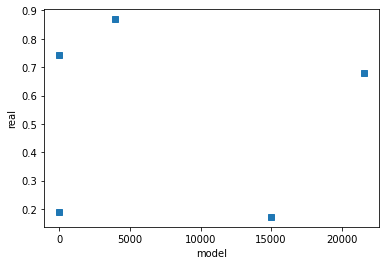

In [457]:
sel_both=np.where(sel_real*sel_simu)[0]
i=sel_both[3]
#time dt2[i]
pl.plot(simu_all[:,i],irsens2[:,i],'s')
pl.xlabel("model")
pl.ylabel("real")

In [596]:
mag_calc=[mag_inter(v) for v in dt2]
save_data=[dt2,sat_coords,mag_calc,mbody,irsens22,angle2]
np.savez("att_oct_data.npz",dt2=dt2,sat_coords=sat_coords,mag_calc=mag_calc,mag_meas=mbody,sun_meas=irsens22,angle=angle2,sun_vec=sunvec_apy)

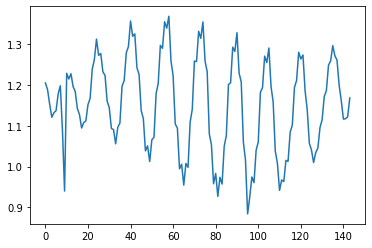

In [90]:
cangs2=(mags[1:,:]*mags[:-1,:]).sum(1)/pomag[0]['total-intensity']**2
pl.plot(cangs2)
#cangs2[cangs2>1]=1
#pl.plot(dt[1:-2][10:40],np.rad2deg(np.arccos(cangs2[10:40])),'-+')

## extra calculations

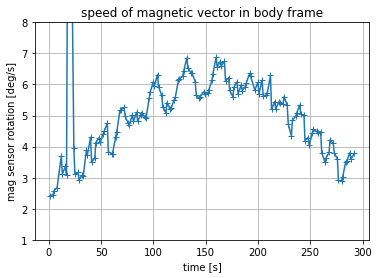

In [279]:
cangs=(mbody[1:,:]*mbody[:-1,:]).sum(1)
pl.plot(dt[1:-2],np.rad2deg(np.arccos(cangs))/ddt,'-+')
pl.xlabel("time [s]")
pl.ylim(1,8)
pl.grid()
pl.ylabel("mag sensor rotation [deg/s]")
pl.title("speed of magnetic vector in body frame")
mbad=np.where(np.rad2deg(np.arccos(cangs))/ddt>10)[0]+1

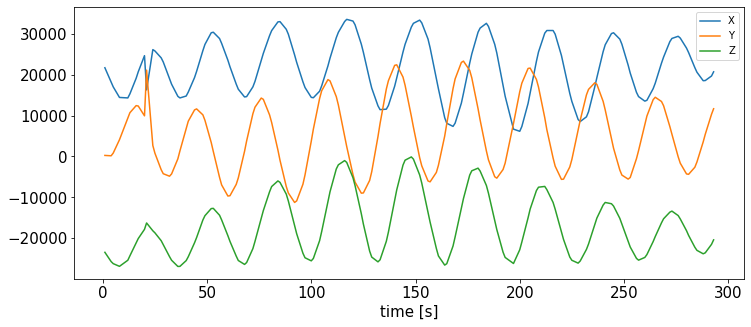

In [482]:
pl.figure(figsize=(12,5))
for m in mags.T:
    pl.plot(dt2,m)
pl.legend(list("XYZ"))
ax=pl.gca()
#ax.get_xlabel().set_fontsize(60)
pl.xlabel("time [s]",fontsize=15)
pl.xticks(fontsize=15);
pl.yticks(fontsize=15);